# Content

- [Importing libraries](#Importing-libraries)
- [Importing audios](#Importing-audios)
- [Feature extraction](#Feature-extraction)
- [Creating the dataframe](#Creating-the-dataframe)
- [Validation set](#Validation-set)


# Importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from glob import glob

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix,plot_confusion_matrix,cohen_kappa_score,accuracy_score,recall_score,precision_score,f1_score,classification_report

# Importing audios

In [6]:
# Directory for audio files:
data_dir = r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\audio"
audio_files = glob(data_dir + r"\*.wav")
len(audio_files)

2000

In [12]:
# First audio file, create time array:
audio, sfreq = lr.load(audio_files[0])

In [13]:
audio.shape

(110250,)

## Example of chromagram plotting.


[Text(0.5, 1.0, 'Chromagram')]

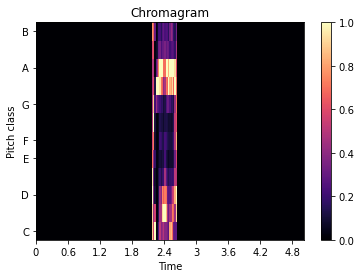

In [6]:
# Example of chromagram plotting.
chroma = lr.feature.chroma_stft(audio)
fig, ax = plt.subplots()
img = lr.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

# Feature Extraction

###### Features to extract.

    melfcc = lr.feature.mfcc(audio) # Mel Frequency Cepstral Coeﬃcients default: 20 measures.
    spc = lr.feature.spectral_centroid(audio) # spectral centroid
    zcr = lr.feature.zero_crossing_rate(audio) # zero crossing rate
    chroma = lr.feature.chroma_stft(audio) # chroma
    sro = lr.feature.spectral_rolloff(audio) # spectral roll off
    spbw = lr.feature.spectral_bandwidth(audio) # spectral bandwidth
    rms = lr.feature.rms(audio) # root mean square.
    spfl = lr.feature.spectral_flatness(audio) # spectral flatness



###### Adding new features after first model attempt:

    spct = lr.feature.spectral_contrast - Spectral contrast
    poly = lr.feature.poly_features - Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.
    tc = lr.feature.tonnetz - Tonal centroid features
    ac = lr.autocorrelate - Autocorrelation

In [7]:
column_names = ["mfcc avg", "mfcc mdn", "mfcc std","mfcc sum", "spc avg", "spc mdn", "spc std", "spc sum", "zcr avg", "zcr mdn", "zcr std", "zcr sum",
                "chroma avg", "chroma mdn", "chroma std", "chroma sum", "sro avg", "sro mdn", "sro std", "sro sum", "spbw avg", "spbw mdn", "spbw std", "spbw sum",
                "rms avg", "rms mdn", "rms std", "rms sum", "spfl avg", "spfl mdn", "spfl std", "spfl sum", "spct avg", "spct mdn", "spct std", "spct sum",
                "poly avg", "poly mdn", "poly std", "poly sum", "tc avg", "tc mdn", "tc std", "tc sum", "ac avg", "ac mdn", "ac std", "ac sum"]

In [5]:
def feat_list_audio(audiofile):
    '''
    This function creates a dataframe with the desired features from an audio file.
    Input is the audio file.
    Output is a single-row dataframe.
    '''
    mfcc = lr.feature.mfcc(audiofile) # Mel Frequency Cepstral Coeﬃcients default: 20 measures.
    spc = lr.feature.spectral_centroid(audiofile) # spectral centroid
    zcr = lr.feature.zero_crossing_rate(audiofile) # zero crossing rate
    chroma = lr.feature.chroma_stft(audiofile) # chroma
    sro = lr.feature.spectral_rolloff(audiofile) # spectral roll off
    spbw = lr.feature.spectral_bandwidth(audiofile) # spectral bandwidth
    rms = lr.feature.rms(audiofile) # root mean square.
    spfl = lr.feature.spectral_flatness(audiofile) # spectral flatness
    spct = lr.feature.spectral_contrast(audiofile)
    poly = lr.feature.poly_features(audiofile)
    tc = lr.feature.tonnetz(audiofile)
    ac = lr.autocorrelate(audiofile)
    
    # Create a list
    feat_list = [np.mean(mfcc), np.median(mfcc), np.std(mfcc), np.sum(mfcc), np.mean(spc), np.median(spc), np.std(spc), np.sum(spc), 
                 np.mean(zcr), np.median(zcr), np.std(zcr), np.sum(zcr), np.mean(chroma), np.median(chroma), np.std(chroma), np.sum(chroma),
                 np.mean(sro), np.median(sro), np.std(sro), np.sum(sro), np.mean(spbw), np.median(spbw), np.std(spbw), np.sum(spbw), 
                 np.mean(rms), np.median(rms), np.std(rms), np.sum(rms), np.mean(spfl), np.median(spfl), np.std(spfl), np.sum(spfl),
                 np.mean(spct), np.median(spct), np.std(spct), np.sum(spct), np.mean(poly), np.median(poly), np.std(poly), np.sum(poly), 
                 np.mean(tc), np.median(tc), np.std(tc), np.sum(tc), np.mean(ac), np.median(ac), np.std(ac), np.sum(ac)]
    return feat_list

In [23]:
import warnings
warnings.filterwarnings("ignore")

feat_df = pd.DataFrame(columns=column_names)

for i in range(0, len(audio_files)):
    single_audio_file, sfreq = lr.load(audio_files[i])
    feat_list_of_file = feat_list_audio(single_audio_file)
    feat_df.loc[i] = feat_list_of_file


# Creating the dataframe

In [26]:
#Save Dataframe.
# feat_df.to_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\feat_df.csv")
df_audio_feats = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\feat_df.csv")
df_audio_feats

,Unnamed: 0,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,...,poly std,poly sum,tc avg,tc mdn,tc std,tc sum,ac avg,ac mdn,ac std,ac sum
0,0,-30.621037,0.000000,133.394226,-132282.875000,215.788225,0.000000,717.176604,46610.256598,0.012221,...,0.882710,48.567494,0.008107,0.000000,0.057337,10.506051,0.000862,-2.629388e-18,1.980245,95.034199
1,1,-25.271778,-14.726506,43.930939,-109174.078125,3851.174848,3770.651034,471.515510,831853.767218,0.303727,...,0.620696,244.403774,-0.002649,-0.005608,0.079221,-3.433233,0.001883,-2.706105e-03,4.992041,207.627041
2,2,6.678396,4.165037,16.359137,28850.671875,3417.287781,3386.712550,319.508973,738134.160685,0.385362,...,3.380231,1434.450520,0.004020,0.002992,0.041828,5.210136,0.050211,4.283366e-02,165.720405,5535.731441
3,3,6.997509,4.692041,15.818431,30229.240234,3495.792669,3475.238825,183.036219,755091.216591,0.386979,...,3.483821,1451.893795,-0.004242,-0.003369,0.031381,-5.497910,0.047756,-2.901005e-01,713.349622,5265.063297
4,4,-14.365158,-2.496537,98.979042,-62057.484375,1448.737715,1486.180399,390.742728,312927.346421,0.045754,...,0.136084,43.480455,0.003510,-0.000574,0.047373,4.549492,0.000060,-3.430340e-05,0.298194,6.667188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-6.576713,-0.237287,59.854641,-28411.398438,1747.478407,1671.889413,306.301225,377455.335829,0.103850,...,1.576981,433.033715,0.022402,0.004366,0.099978,29.033614,0.007470,5.828310e-05,23.564728,823.530559
1996,1996,-12.022120,-10.838694,15.031034,-51935.558594,4090.176813,4087.804534,86.412482,883478.191684,0.309326,...,1.463746,631.218991,-0.022439,-0.024682,0.060606,-29.080494,0.006472,1.537501e-02,79.680088,713.503296
1997,1997,-6.922936,0.210413,76.220184,-29907.085938,1405.561102,1518.197320,952.325587,303601.198062,0.041597,...,1.667313,325.879781,0.003534,-0.001723,0.054725,4.580664,0.008843,-7.706453e-16,57.809372,974.955606
1998,1998,-2.007078,1.065828,43.239983,-8670.578125,2345.897297,2325.234869,324.291507,506713.816239,0.112822,...,1.374597,443.478158,0.002648,0.003629,0.044488,3.431848,0.002788,-1.577616e-02,4.704439,307.363161


## Creating category column

In [27]:
meta_audio_files = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\esc50.csv")
meta_audio_files.columns

Index(['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take'], dtype='object')

In [28]:
# Extract file names from audio_files.
filenames_list = []
for i in audio_files:
    filenames_list.append(i.replace("C:\\Users\\trito.DESKTOP-V9IEUOR\\Desktop\\IronHack Data Analyst\\Projects\\Final-Project-DA\\Data\\audio\\", ""))

In [29]:
df_audio_feats["file name"] = filenames_list
df_audio_feats

,Unnamed: 0,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,...,poly sum,tc avg,tc mdn,tc std,tc sum,ac avg,ac mdn,ac std,ac sum,file name
0,0,-30.621037,0.000000,133.394226,-132282.875000,215.788225,0.000000,717.176604,46610.256598,0.012221,...,48.567494,0.008107,0.000000,0.057337,10.506051,0.000862,-2.629388e-18,1.980245,95.034199,1-100032-A-0.wav
1,1,-25.271778,-14.726506,43.930939,-109174.078125,3851.174848,3770.651034,471.515510,831853.767218,0.303727,...,244.403774,-0.002649,-0.005608,0.079221,-3.433233,0.001883,-2.706105e-03,4.992041,207.627041,1-100038-A-14.wav
2,2,6.678396,4.165037,16.359137,28850.671875,3417.287781,3386.712550,319.508973,738134.160685,0.385362,...,1434.450520,0.004020,0.002992,0.041828,5.210136,0.050211,4.283366e-02,165.720405,5535.731441,1-100210-A-36.wav
3,3,6.997509,4.692041,15.818431,30229.240234,3495.792669,3475.238825,183.036219,755091.216591,0.386979,...,1451.893795,-0.004242,-0.003369,0.031381,-5.497910,0.047756,-2.901005e-01,713.349622,5265.063297,1-100210-B-36.wav
4,4,-14.365158,-2.496537,98.979042,-62057.484375,1448.737715,1486.180399,390.742728,312927.346421,0.045754,...,43.480455,0.003510,-0.000574,0.047373,4.549492,0.000060,-3.430340e-05,0.298194,6.667188,1-101296-A-19.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-6.576713,-0.237287,59.854641,-28411.398438,1747.478407,1671.889413,306.301225,377455.335829,0.103850,...,433.033715,0.022402,0.004366,0.099978,29.033614,0.007470,5.828310e-05,23.564728,823.530559,5-263831-B-6.wav
1996,1996,-12.022120,-10.838694,15.031034,-51935.558594,4090.176813,4087.804534,86.412482,883478.191684,0.309326,...,631.218991,-0.022439,-0.024682,0.060606,-29.080494,0.006472,1.537501e-02,79.680088,713.503296,5-263902-A-36.wav
1997,1997,-6.922936,0.210413,76.220184,-29907.085938,1405.561102,1518.197320,952.325587,303601.198062,0.041597,...,325.879781,0.003534,-0.001723,0.054725,4.580664,0.008843,-7.706453e-16,57.809372,974.955606,5-51149-A-25.wav
1998,1998,-2.007078,1.065828,43.239983,-8670.578125,2345.897297,2325.234869,324.291507,506713.816239,0.112822,...,443.478158,0.002648,0.003629,0.044488,3.431848,0.002788,-1.577616e-02,4.704439,307.363161,5-61635-A-8.wav


## Adding the category column

In [30]:
# Adding the category column to the audio_feats dataframe
new_meta_df = meta_audio_files.drop(['fold', 'target', 'esc10', 'src_file', 'take'], axis=1)
audio_feats2 =  pd.concat([df_audio_feats, new_meta_df], axis=1)
audio_feats2 = audio_feats2.loc[:,~audio_feats2.columns.duplicated()]
audio_feats2

,Unnamed: 0,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,...,tc mdn,tc std,tc sum,ac avg,ac mdn,ac std,ac sum,file name,filename,category
0,0,-30.621037,0.000000,133.394226,-132282.875000,215.788225,0.000000,717.176604,46610.256598,0.012221,...,0.000000,0.057337,10.506051,0.000862,-2.629388e-18,1.980245,95.034199,1-100032-A-0.wav,1-100032-A-0.wav,dog
1,1,-25.271778,-14.726506,43.930939,-109174.078125,3851.174848,3770.651034,471.515510,831853.767218,0.303727,...,-0.005608,0.079221,-3.433233,0.001883,-2.706105e-03,4.992041,207.627041,1-100038-A-14.wav,1-100038-A-14.wav,chirping_birds
2,2,6.678396,4.165037,16.359137,28850.671875,3417.287781,3386.712550,319.508973,738134.160685,0.385362,...,0.002992,0.041828,5.210136,0.050211,4.283366e-02,165.720405,5535.731441,1-100210-A-36.wav,1-100210-A-36.wav,vacuum_cleaner
3,3,6.997509,4.692041,15.818431,30229.240234,3495.792669,3475.238825,183.036219,755091.216591,0.386979,...,-0.003369,0.031381,-5.497910,0.047756,-2.901005e-01,713.349622,5265.063297,1-100210-B-36.wav,1-100210-B-36.wav,vacuum_cleaner
4,4,-14.365158,-2.496537,98.979042,-62057.484375,1448.737715,1486.180399,390.742728,312927.346421,0.045754,...,-0.000574,0.047373,4.549492,0.000060,-3.430340e-05,0.298194,6.667188,1-101296-A-19.wav,1-101296-A-19.wav,thunderstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-6.576713,-0.237287,59.854641,-28411.398438,1747.478407,1671.889413,306.301225,377455.335829,0.103850,...,0.004366,0.099978,29.033614,0.007470,5.828310e-05,23.564728,823.530559,5-263831-B-6.wav,5-263831-B-6.wav,hen
1996,1996,-12.022120,-10.838694,15.031034,-51935.558594,4090.176813,4087.804534,86.412482,883478.191684,0.309326,...,-0.024682,0.060606,-29.080494,0.006472,1.537501e-02,79.680088,713.503296,5-263902-A-36.wav,5-263902-A-36.wav,vacuum_cleaner
1997,1997,-6.922936,0.210413,76.220184,-29907.085938,1405.561102,1518.197320,952.325587,303601.198062,0.041597,...,-0.001723,0.054725,4.580664,0.008843,-7.706453e-16,57.809372,974.955606,5-51149-A-25.wav,5-51149-A-25.wav,footsteps
1998,1998,-2.007078,1.065828,43.239983,-8670.578125,2345.897297,2325.234869,324.291507,506713.816239,0.112822,...,0.003629,0.044488,3.431848,0.002788,-1.577616e-02,4.704439,307.363161,5-61635-A-8.wav,5-61635-A-8.wav,sheep


In [20]:
audio_feats2["category"].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

## Creating a class column

In [31]:
# Creating a class column to group categories in 5 classes: animals, natural soundscapes & water sounds, human non-speech sounds,
# interior/domestic sounds, and exterior/urban noises.

animals_list = ["dog", "rooster", "pig", "cow", "frog", "cat", "hen", "insects", "sheep", "crow"]
natural_list = ["rain", "sea_waves", "crackling_fire", "crickets", "chirping_birds", "water_drops", "wind", "pouring_water", "toilet_flush", "thunderstorm"]
human_list = ["crying_baby", "sneezing", "clapping", "breathing", "coughing", "footsteps", "laughing", "brushing_teeth", "snoring", "drinking_sipping"]
interior_list = ["door_wood_knock", "mouse_click", "keyboard_typing", "door_wood_creaks", "can_opening", 
                 "washing_machine", "vacuum_cleaner", "clock_alarm", "clock_tick", "glass_breaking"]
exterior_list = ["helicopter", "chainsaw", "siren", "car_horn", "engine", "train", "church_bells", "airplane", "fireworks", "hand_saw"]
audio_feats2["class"] = np.nan

for i in range(0,2000):
    if audio_feats2["category"][i] in animals_list:
        audio_feats2["class"][i] = "animals"
    elif audio_feats2["category"][i] in natural_list:
        audio_feats2["class"][i] = "natural soundscapes & water"
    elif audio_feats2["category"][i] in human_list:
        audio_feats2["class"][i] = "human"
    elif audio_feats2["category"][i] in interior_list:
        audio_feats2["class"][i] = "interior/domestic"
    elif audio_feats2["category"][i] in exterior_list:
        audio_feats2["class"][i] = "exterior/urban"

In [32]:
# audio_feats2.drop(columns=["Unnamed: 0"], inplace=True)
audio_feats2

,Unnamed: 0,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,...,tc std,tc sum,ac avg,ac mdn,ac std,ac sum,file name,filename,category,class
0,0,-30.621037,0.000000,133.394226,-132282.875000,215.788225,0.000000,717.176604,46610.256598,0.012221,...,0.057337,10.506051,0.000862,-2.629388e-18,1.980245,95.034199,1-100032-A-0.wav,1-100032-A-0.wav,dog,animals
1,1,-25.271778,-14.726506,43.930939,-109174.078125,3851.174848,3770.651034,471.515510,831853.767218,0.303727,...,0.079221,-3.433233,0.001883,-2.706105e-03,4.992041,207.627041,1-100038-A-14.wav,1-100038-A-14.wav,chirping_birds,natural soundscapes & water
2,2,6.678396,4.165037,16.359137,28850.671875,3417.287781,3386.712550,319.508973,738134.160685,0.385362,...,0.041828,5.210136,0.050211,4.283366e-02,165.720405,5535.731441,1-100210-A-36.wav,1-100210-A-36.wav,vacuum_cleaner,interior/domestic
3,3,6.997509,4.692041,15.818431,30229.240234,3495.792669,3475.238825,183.036219,755091.216591,0.386979,...,0.031381,-5.497910,0.047756,-2.901005e-01,713.349622,5265.063297,1-100210-B-36.wav,1-100210-B-36.wav,vacuum_cleaner,interior/domestic
4,4,-14.365158,-2.496537,98.979042,-62057.484375,1448.737715,1486.180399,390.742728,312927.346421,0.045754,...,0.047373,4.549492,0.000060,-3.430340e-05,0.298194,6.667188,1-101296-A-19.wav,1-101296-A-19.wav,thunderstorm,natural soundscapes & water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,-6.576713,-0.237287,59.854641,-28411.398438,1747.478407,1671.889413,306.301225,377455.335829,0.103850,...,0.099978,29.033614,0.007470,5.828310e-05,23.564728,823.530559,5-263831-B-6.wav,5-263831-B-6.wav,hen,animals
1996,1996,-12.022120,-10.838694,15.031034,-51935.558594,4090.176813,4087.804534,86.412482,883478.191684,0.309326,...,0.060606,-29.080494,0.006472,1.537501e-02,79.680088,713.503296,5-263902-A-36.wav,5-263902-A-36.wav,vacuum_cleaner,interior/domestic
1997,1997,-6.922936,0.210413,76.220184,-29907.085938,1405.561102,1518.197320,952.325587,303601.198062,0.041597,...,0.054725,4.580664,0.008843,-7.706453e-16,57.809372,974.955606,5-51149-A-25.wav,5-51149-A-25.wav,footsteps,human
1998,1998,-2.007078,1.065828,43.239983,-8670.578125,2345.897297,2325.234869,324.291507,506713.816239,0.112822,...,0.044488,3.431848,0.002788,-1.577616e-02,4.704439,307.363161,5-61635-A-8.wav,5-61635-A-8.wav,sheep,animals


## Final Dataframe saving

In [33]:
# Store the final dataframe:
audio_feats2.to_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\final_df.csv")

# Validation set

In this set there are 5 audios, one of each class, that will be used to test the predictions

In [3]:
data_dir2 = r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\validation set sounds"
audio_val = glob(data_dir2 + r"\*.wav")
len(audio_val)

5

In [4]:
audios_5, sfreq = lr.load(audio_val[0])

In [13]:
import warnings
warnings.filterwarnings("ignore")

feat_df2 = pd.DataFrame(columns=column_names)

for i in range(0, len(audio_val)):
    single_audio, sfreq = lr.load(audio_val[i])
    feat_list_of_file = feat_list_audio(single_audio)
    feat_df2.loc[i] = feat_list_of_file

In [14]:
feat_df2

,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,zcr mdn,...,poly std,poly sum,tc avg,tc mdn,tc std,tc sum,ac avg,ac mdn,ac std,ac sum
0,-20.328279,-4.794946,80.626434,-87818.164062,2857.687784,2699.085641,550.125634,617260.561348,0.191008,0.192139,...,3.760721,461.341031,-0.001616,0.003247,0.042859,-2.093831,0.286132,1.487164e-15,29.727285,31546.088278
1,-20.742882,0.000000,110.966766,-89609.250000,710.331491,0.000000,1029.717598,153431.602154,0.033960,0.000000,...,1.258197,136.396172,0.011194,0.000247,0.117367,14.507418,0.005372,-8.459412e-16,49.305734,592.226984
2,-23.803082,0.000000,106.855492,-102829.312500,1461.116387,1236.961175,1618.969948,315601.139568,0.063049,0.036621,...,1.521145,159.052784,0.006290,0.004955,0.051860,8.151242,0.002437,-7.309574e-18,5.415907,268.698535
3,-24.871214,-7.386284,96.986153,-107443.640625,3137.045923,3595.286279,1229.686895,677601.919293,0.215927,0.227295,...,0.540952,70.900350,0.001689,0.003584,0.027174,2.189541,0.000535,-8.940359e-16,1.068635,58.946175
4,-1.244991,-0.077209,37.328632,-5378.360840,2691.376402,2710.854593,497.150014,581337.302895,0.143749,0.143311,...,1.613889,524.025745,0.046963,0.031508,0.060753,60.863503,0.006392,-3.547813e-15,6.098039,704.736233


In [15]:
#Save Dataframe.
feat_df2.to_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\val_df.csv")